<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-27 00:52:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  67.4MB/s    in 3.0s    

2025-04-27 00:52:22 (67.4 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [13]:
QUERY = "SELECT CompTotal FROM main"
df_comptotal = pd.read_sql_query(QUERY, conn)
print(df_comptotal['CompTotal'].unique())

[     nan 2040000.   28000. ...  254600.  247433.   77700.]


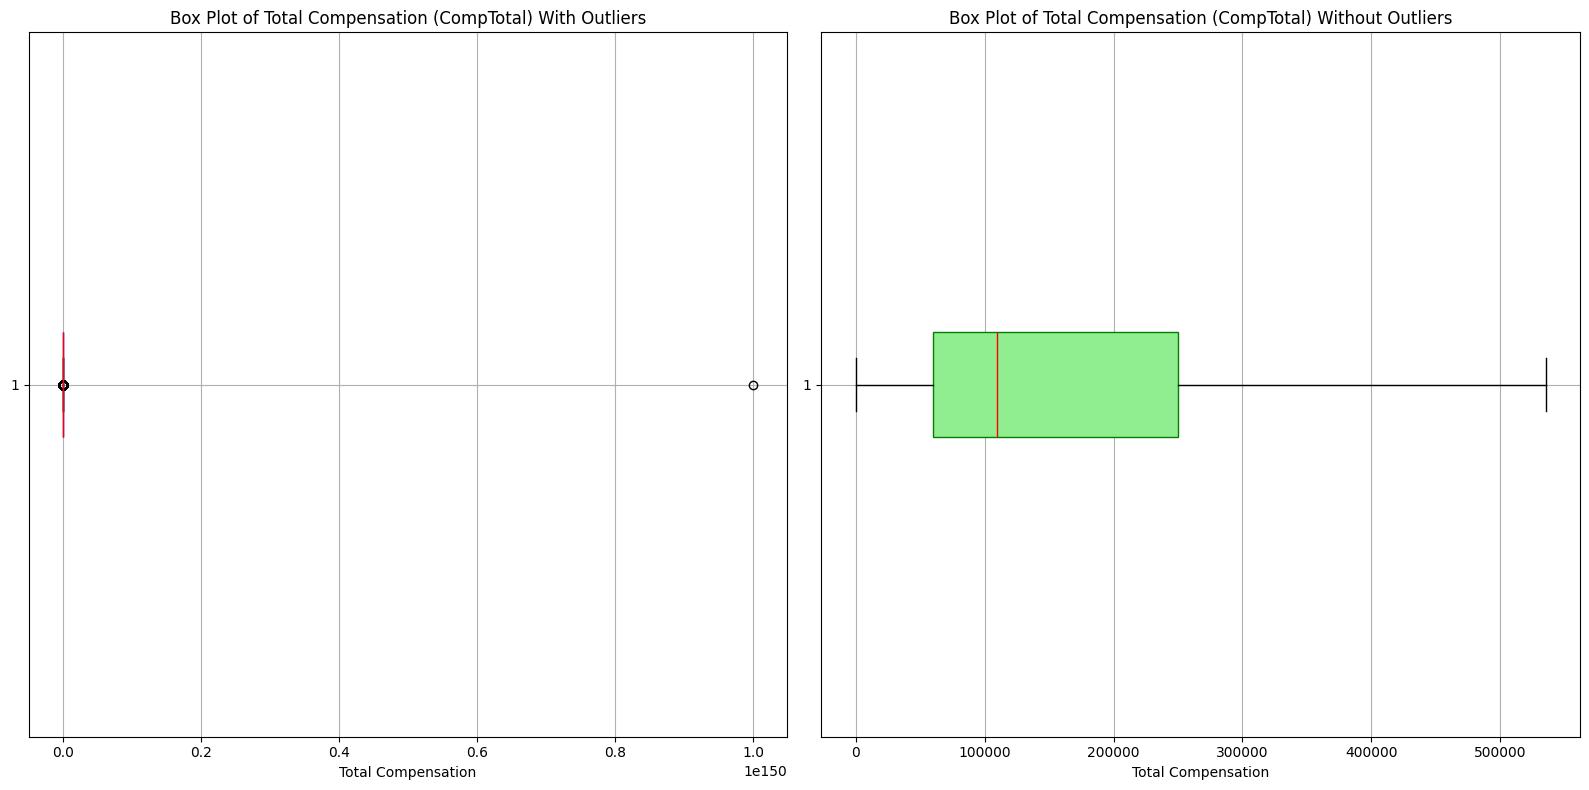

In [47]:
# your code goes here
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
# drop na
df = df.dropna(subset=['CompTotal'])
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
# create subplots with and without outliers
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Two subplots side by side
# boxplot with outliers
ax[0].boxplot(df['CompTotal'], vert=False, patch_artist=True,
              boxprops=dict(facecolor='skyblue', color='blue'),
              medianprops=dict(color='red'))
ax[0].set_title('Box Plot of Total Compensation (CompTotal) With Outliers')
ax[0].set_xlabel('Total Compensation')
ax[0].grid(True)
# boxplot without outliers
ax[1].boxplot(df['CompTotal'], vert=False, patch_artist=True, showfliers=False,  # Hide outliers
              boxprops=dict(facecolor='lightgreen', color='green'),
              medianprops=dict(color='red'))
ax[1].set_title('Box Plot of Total Compensation (CompTotal) Without Outliers')
ax[1].set_xlabel('Total Compensation')
ax[1].grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


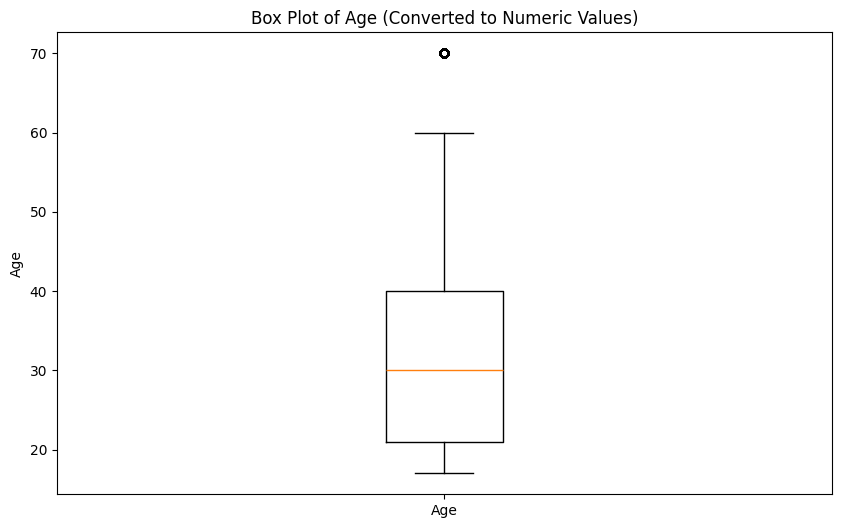

In [14]:
# your code goes here
QUERY = "SELECT Age FROM main"
df_age = pd.read_sql_query(QUERY, conn)
# age mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
# map age to numeric with dictionary
df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)
# drop na
df_age_clean = df_age.dropna(subset=['AgeNumeric'])
# boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age_clean['AgeNumeric'])
plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.ylabel('Age')
plt.xticks([1], ['Age'])
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


CompTotal NaN values count: 0


<Figure size 1200x800 with 0 Axes>

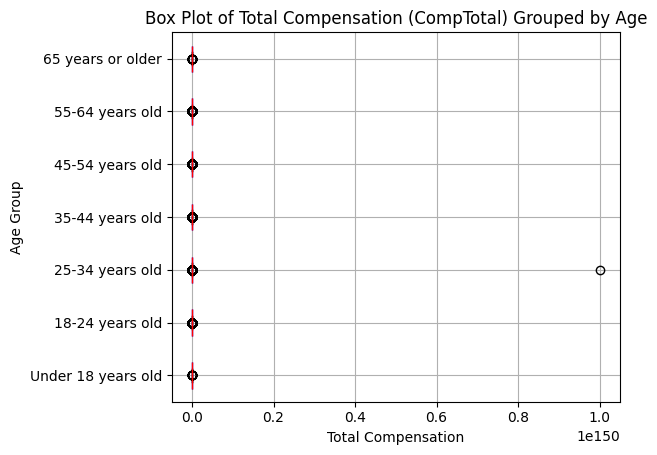

Text(0.5, 0, 'Total Compensation')

<Figure size 1200x800 with 0 Axes>

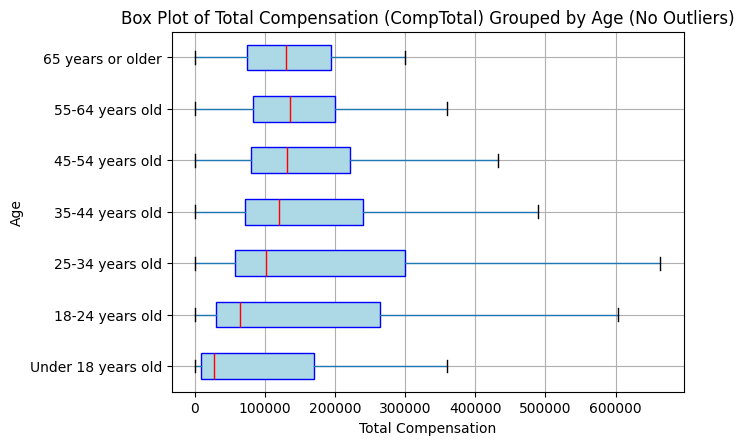

In [43]:
# your code goes here
# your code goes here
QUERY = "SELECT CompTotal, Age FROM main"
df = pd.read_sql_query(QUERY, conn)
# drop nan and 'Prefer not to say'
df = df.dropna(subset=['CompTotal'])
df = df[df['Age'] != 'Prefer not to say']
# ensure 'CompTotal' is numeric 
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
print("CompTotal NaN values count:", df['CompTotal'].isna().sum())
df = df[df['CompTotal'] > 0]
# convert 'Age' to categorical type with ordered categories
df['Age'] = pd.Categorical(df['Age'], categories=[
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'], ordered=True)
# boxplot with outliers
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Age', vert=False, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Age')
plt.suptitle('')  # Suppress the default title created by pandas boxplot
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()
# boxplot without outliers
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Age', vert=False, patch_artist=True, 
           showfliers=False,  # Hide outliers
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Age (No Outliers)')
plt.suptitle('')  # Suppress the default title created by pandas boxplot
plt.xlabel('Total Compensation')

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


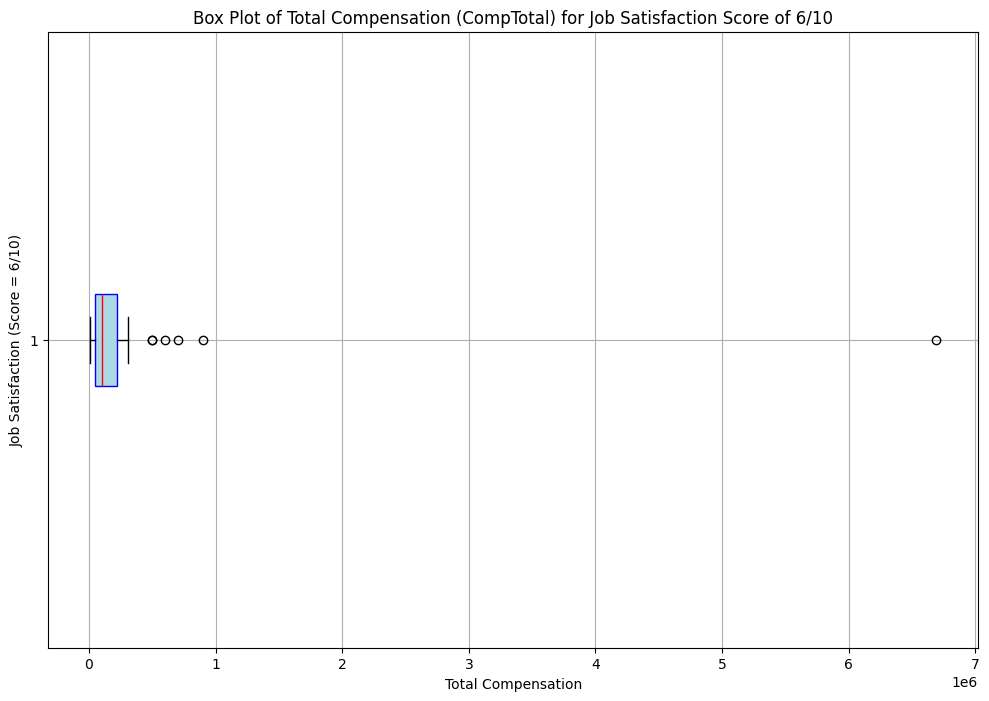

In [38]:
# your code goes here
QUERY = "SELECT CompTotal, JobSatPoints_6 FROM main"
df = pd.read_sql_query(QUERY, conn)
# drop na
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])
df_filtered = df[df['JobSatPoints_6'] == 6]
# boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(df_filtered['CompTotal'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal) for Job Satisfaction Score of 6/10')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (Score = 6/10)')
plt.grid(True)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


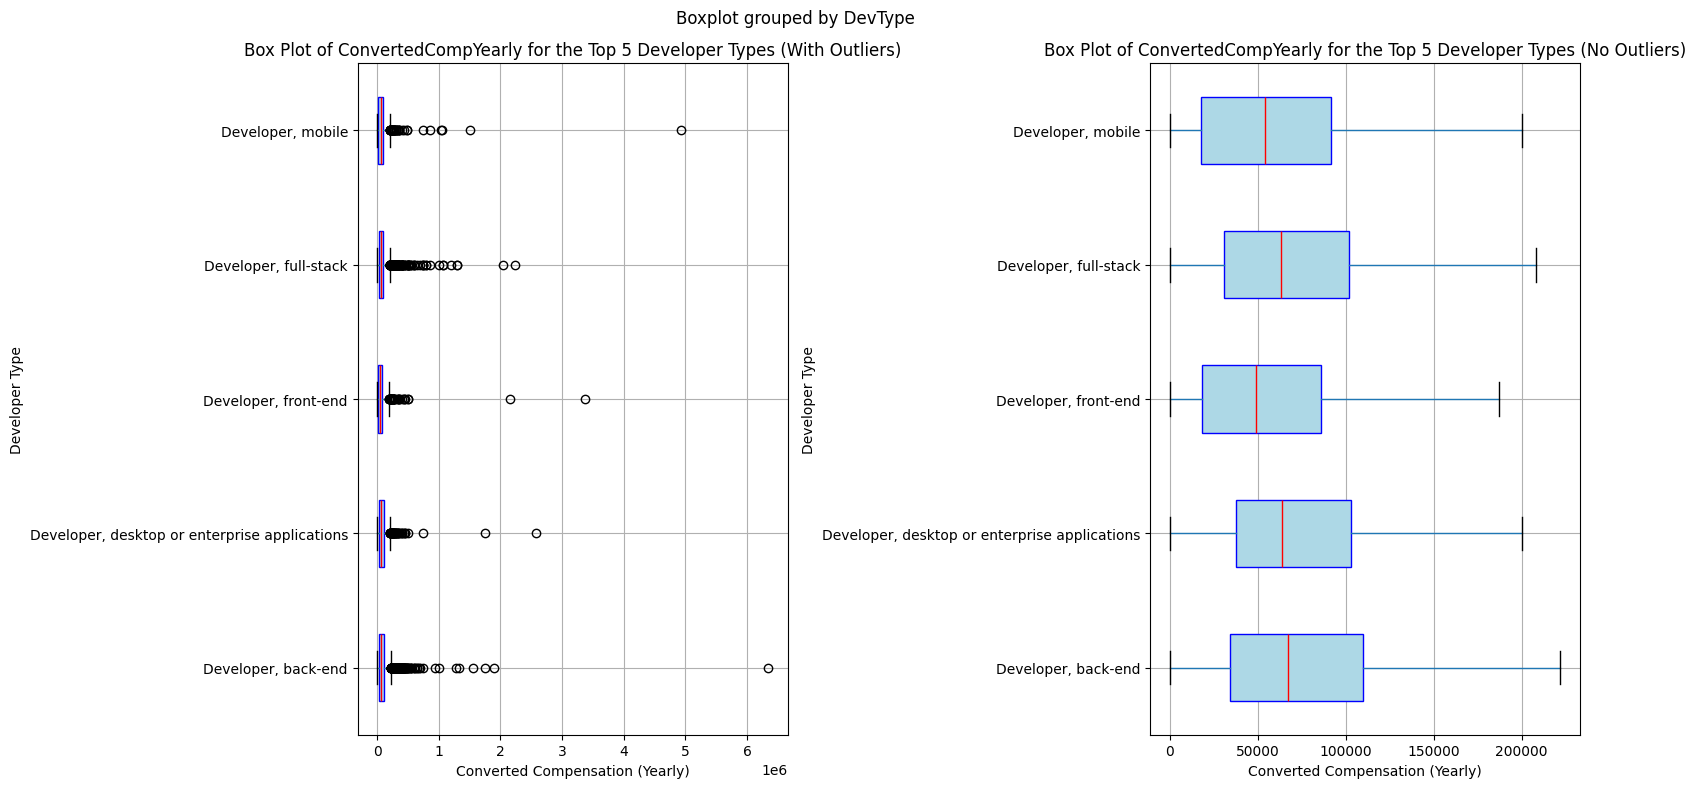

In [46]:
# your code goes here
QUERY = "SELECT ConvertedCompYearly, DevType FROM main"
df = pd.read_sql_query(QUERY, conn)
# remove nan
df = df.dropna(subset=['ConvertedCompYearly', 'DevType'])
# get top 5 dev types
top_5_devtypes = df['DevType'].value_counts().head(5).index
df_top_5_devtypes = df[df['DevType'].isin(top_5_devtypes)]
# create subplots with and without outliers
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Two subplots side by side
# boxplot with outliers
df_top_5_devtypes.boxplot(column='ConvertedCompYearly', by='DevType', vert=False, patch_artist=True,
                           ax=ax[0],  # specify the subplot for the first plot
                           boxprops=dict(facecolor='lightblue', color='blue'),
                           medianprops=dict(color='red'))
ax[0].set_title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types (With Outliers)')
ax[0].set_xlabel('Converted Compensation (Yearly)')
ax[0].set_ylabel('Developer Type')
ax[0].grid(True)
# boxplot without outliers
df_top_5_devtypes.boxplot(column='ConvertedCompYearly', by='DevType', vert=False, patch_artist=True,
                           showfliers=False,  # Hide outliers
                           ax=ax[1],  # specify the subplot for the second plot
                           boxprops=dict(facecolor='lightblue', color='blue'),
                           medianprops=dict(color='red'))
ax[1].set_title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types (No Outliers)')
ax[1].set_xlabel('Converted Compensation (Yearly)')
ax[1].set_ylabel('Developer Type')
ax[1].grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


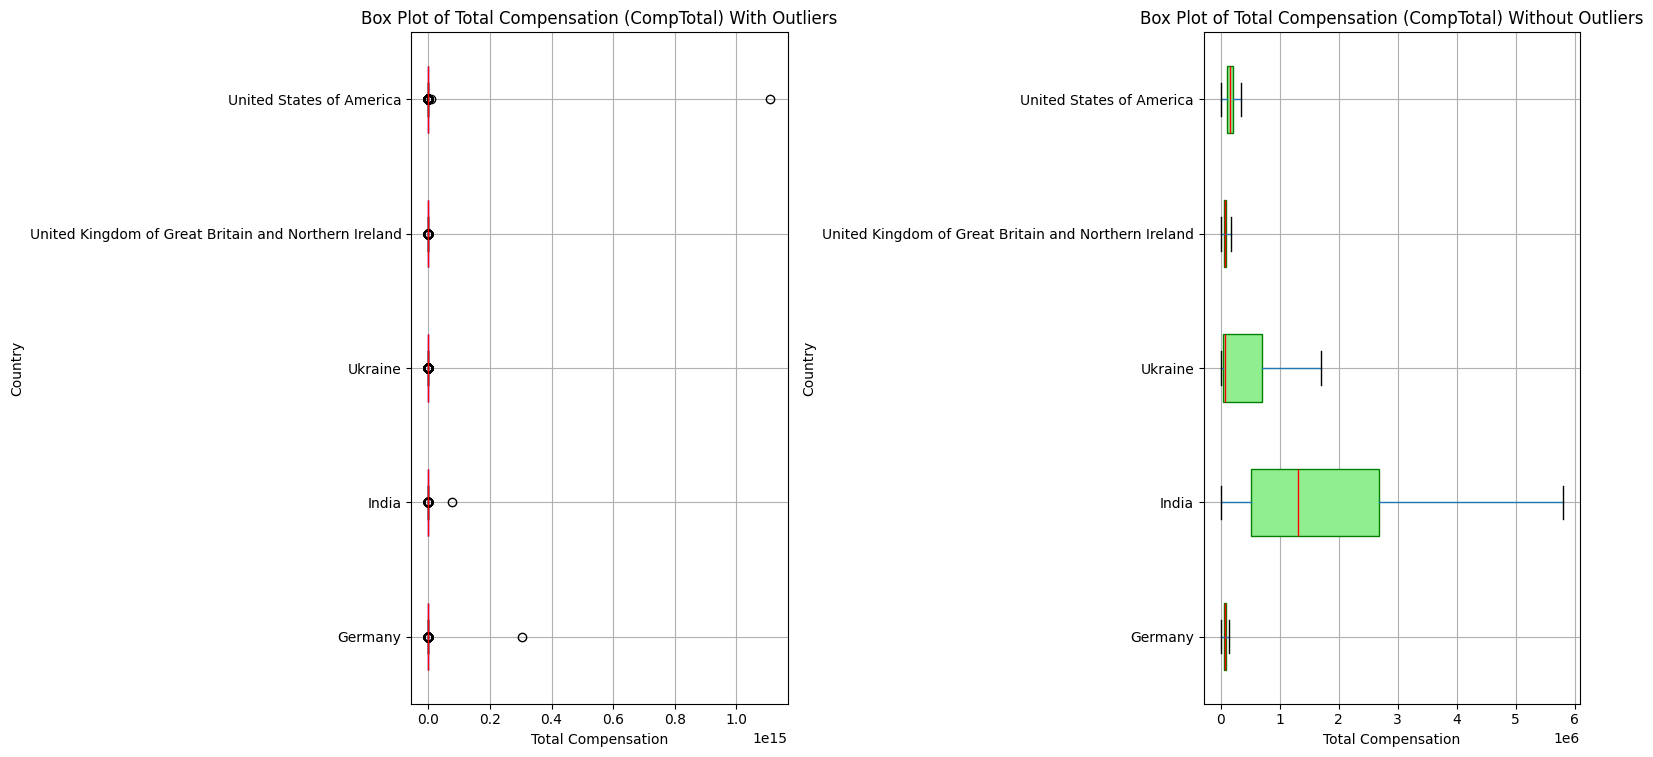

In [50]:
# your code goes here
QUERY = "SELECT CompTotal, Country FROM main"
df = pd.read_sql_query(QUERY, conn)
# clean
df = df.dropna(subset=['CompTotal', 'Country'])
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
# top 5 countries by frequency
top_5_countries = df['Country'].value_counts().head(5).index
df_top_5_countries = df[df['Country'].isin(top_5_countries)]
# create subplots, one with outliers and one without
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  
# boxplot with outliers
df_top_5_countries.boxplot(column='CompTotal', by='Country', vert=False, patch_artist=True,
                           ax=ax[0], boxprops=dict(facecolor='skyblue', color='blue'),
                           medianprops=dict(color='red'))
ax[0].set_title('Box Plot of Total Compensation (CompTotal) With Outliers')
ax[0].set_xlabel('Total Compensation')
ax[0].set_ylabel('Country')
ax[0].grid(True)
# boxplot without outliers
df_top_5_countries.boxplot(column='CompTotal', by='Country', vert=False, patch_artist=True,
                           ax=ax[1], showfliers=False,  # Hide outliers
                           boxprops=dict(facecolor='lightgreen', color='green'),
                           medianprops=dict(color='red'))
ax[1].set_title('Box Plot of Total Compensation (CompTotal) Without Outliers')
ax[1].set_xlabel('Total Compensation')
ax[1].set_ylabel('Country')
ax[1].grid(True)
plt.tight_layout()
plt.suptitle('')  
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 2000x800 with 0 Axes>

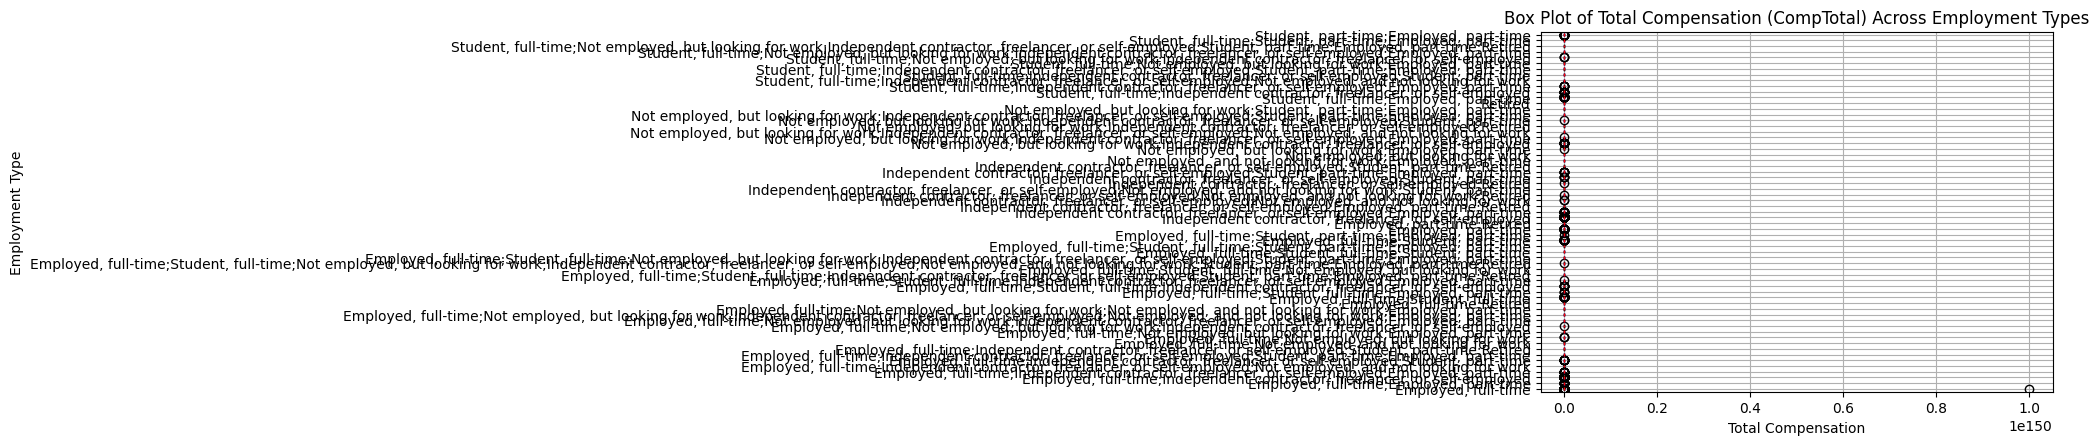

In [60]:
# with outliers
QUERY = "SELECT CompTotal, Employment FROM main"
df = pd.read_sql_query(QUERY, conn)
# drop nan
df = df.dropna(subset=['CompTotal', 'Employment'])
# ensure numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
# boxplot
plt.figure(figsize=(20, 8))
df.boxplot(column='CompTotal', by='Employment', vert=False, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal) Across Employment Types')
plt.suptitle('')  
plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.grid(True)
plt.show()

/tmp/ipykernel_2264/704843293.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

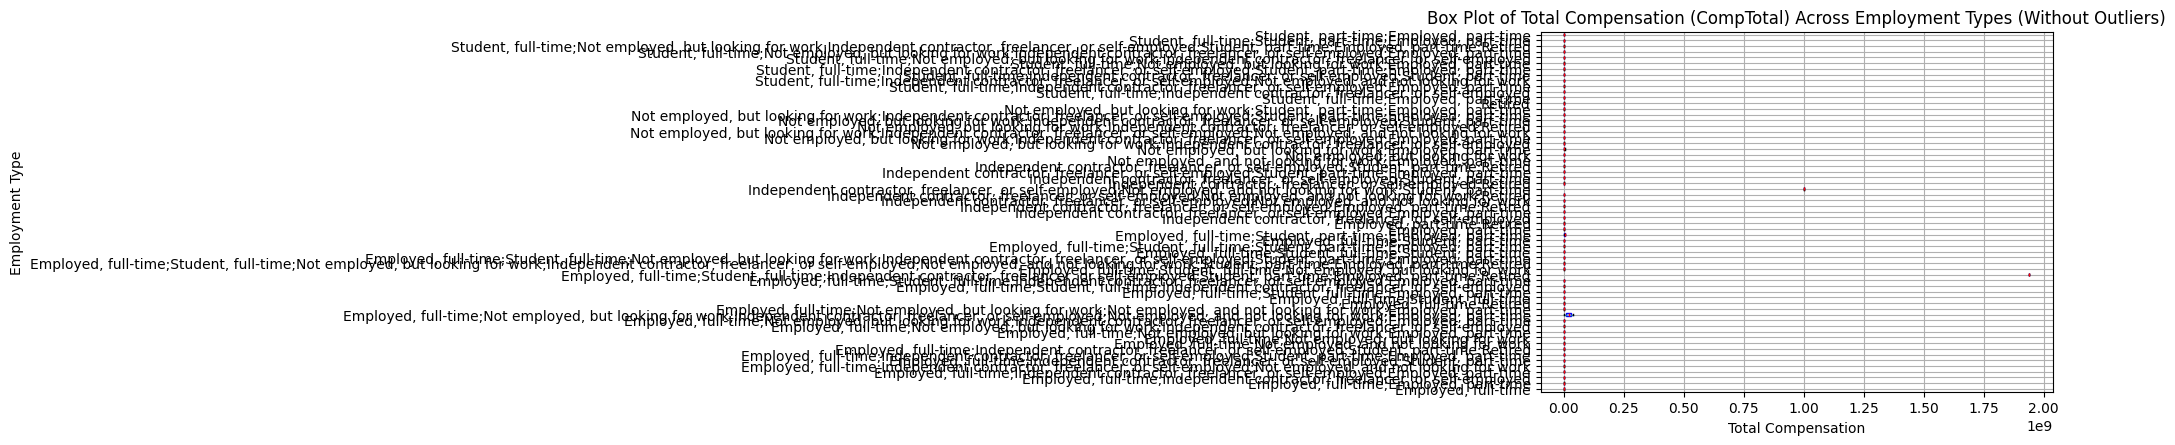

In [62]:
# without outliers
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Employment', vert=False, patch_artist=True, 
           showfliers=False,  
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.title('Box Plot of Total Compensation (CompTotal) Across Employment Types (Without Outliers)')
plt.suptitle('')  
plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_2264/931743571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')


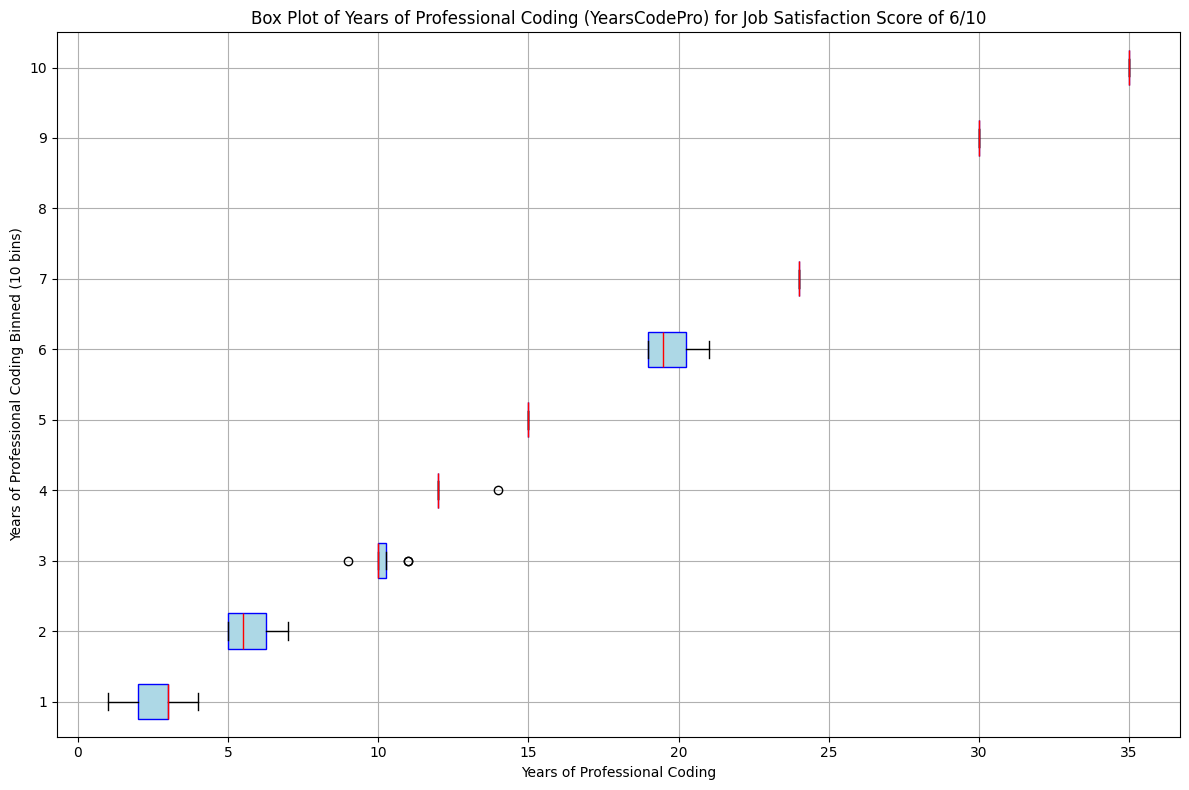

In [64]:
# your code goes here
QUERY = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(QUERY, conn)
# drop na
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])
df_filtered = df[df['JobSatPoints_6'] == 6]
# ensure 'YearsCodePro' is numeric 
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
# drop nan
df_filtered = df_filtered.dropna(subset=['YearsCodePro'])
# bin 'YearsCodePro' into 10 equal bins
df_filtered['YearsCodePro_binned'] = pd.cut(df_filtered['YearsCodePro'], bins=10)
# boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([df_filtered[df_filtered['YearsCodePro_binned'] == bin]['YearsCodePro'] for bin in df_filtered['YearsCodePro_binned'].cat.categories],
            vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Years of Professional Coding (YearsCodePro) for Job Satisfaction Score of 6/10')
plt.xlabel('Years of Professional Coding')
plt.grid(True)
plt.tight_layout()
plt.show()

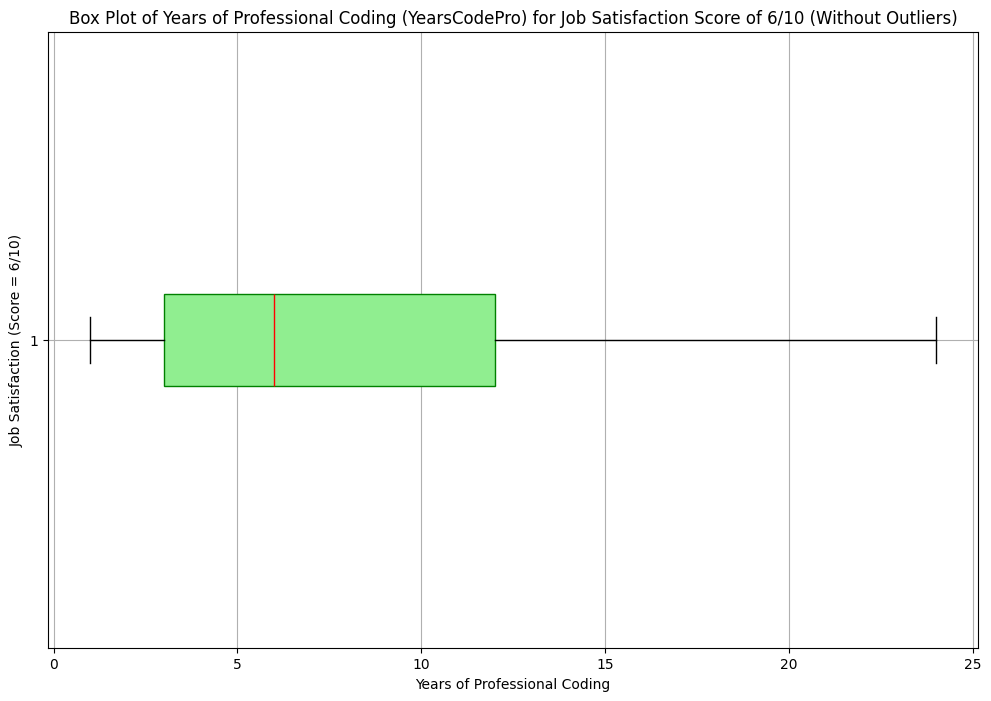

In [65]:
# boxplot without outliers 
plt.figure(figsize=(12, 8))
plt.boxplot(df_filtered['YearsCodePro'], vert=False, patch_artist=True, 
            showfliers=False,  # Exclude outliers
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Years of Professional Coding (YearsCodePro) for Job Satisfaction Score of 6/10 (Without Outliers)')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction (Score = 6/10)')
plt.grid(True)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
